# Build CNN

## Loading image data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.layers import ZeroPadding2D, Dropout, Flatten, add, Reshape
from tensorflow.keras.layers import Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import plot_model,to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras import initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from skimage.transform import resize
#import cv2

from PIL import Image
import os
from shutil import copyfile

In [2]:
os.getcwd()
#os.chdir('/Users/qingruan/Desktop/九章算法项目课件/')

'/groups/dats6501/carrieqing'

In [3]:
category_names = [
'agricultural',
    'airplane', 'baseballdiamond', 'beach', 
    'buildings', 'chaparral', 'denseresidential', 'forest', 
    'freeway', 'golfcourse', 'harbor', 'intersection', 
    'mediumresidential', 'mobilehomepark', 
    'overpass', 'parkinglot', 'river', 'runway', 
    'sparseresidential', 'storagetanks', 'tenniscourt'
]

In [4]:
num_images = 100  # per category
nb_classes = len(category_names)
patch_size = 256  # width and height in pixel
channels = 3

In [5]:
# Load the numpy datasets
images_orig = np.load('new data/UCMerced_images_orig_MultiClass21.npy')
labels_num = np.load('new data/UCMerced_labels_num_MultiClass21.npy')

# Convert labels to categorical 'one hot encoded vector' --> required format for softmax cross-entropy loss.
# Create an array of zeros with length nb_classes and put a 1 at the index of the true label.
labels = to_categorical(labels_num, nb_classes)

print('Orginal Labels: \n')
for i in range(1,(nb_classes)*100+1, 100):
    print(labels_num[i])

print('One-hot encoded Labels: \n')
for i in range(1,(nb_classes)*100+1, 100):
    print(labels[i])

print('\nImages shape: {}'.format(images_orig.shape))
print('\nLabel shape: {}'.format(labels.shape))

Orginal Labels: 

[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
One-hot encoded Labels: 

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 

In [6]:
nb_images = images_orig.shape[0]
nb_images

2100

## Train/val/test Split

In [7]:
nb_images = images_orig.shape[0]
nb_images

2100

In [8]:
X_train, X_test, y_train, y_test = train_test_split(images_orig, labels, 
                                                    test_size=0.2, 
                                                    stratify = labels, 
                                                    random_state=2021)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.25, 
                                                  stratify = y_train,
                                                  random_state=2021) 

# 0.25 x 0.8 = 0.2

In [9]:
print(X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_val.shape,y_test.shape,)

(1260, 64, 64, 3) (420, 64, 64, 3) (420, 64, 64, 3) (1260, 21) (420, 21) (420, 21)


Check how many images per class in train/val/test

In [10]:
def unique_counts(arr):
    unique, counts = np.unique(arr, axis=0, return_counts=True)
    unique_num = [np.where(r==1)[0][0] for r in unique] 
    print(dict(zip(unique_num, counts)))

In [11]:
unique_counts(y_train)
unique_counts(y_val)
unique_counts(y_test)

{20: 60, 19: 60, 18: 60, 17: 60, 16: 60, 15: 60, 14: 60, 13: 60, 12: 60, 11: 60, 10: 60, 9: 60, 8: 60, 7: 60, 6: 60, 5: 60, 4: 60, 3: 60, 2: 60, 1: 60, 0: 60}
{20: 20, 19: 20, 18: 20, 17: 20, 16: 20, 15: 20, 14: 20, 13: 20, 12: 20, 11: 20, 10: 20, 9: 20, 8: 20, 7: 20, 6: 20, 5: 20, 4: 20, 3: 20, 2: 20, 1: 20, 0: 20}
{20: 20, 19: 20, 18: 20, 17: 20, 16: 20, 15: 20, 14: 20, 13: 20, 12: 20, 11: 20, 10: 20, 9: 20, 8: 20, 7: 20, 6: 20, 5: 20, 4: 20, 3: 20, 2: 20, 1: 20, 0: 20}


## Building basic CNN

### [1] Build architecture

conv1: 32*(3,3) filter, same padding, relu + maxpooling; conv2: 64*(3,3) filter, same padding, relu + maxpooling
dropout 0.5
softmax

In [12]:
# parameters:
input_shape = (64, 64, 3)
pool_size = (2, 2)                  # size of pooling area for max pooling
prob_drop_hidden = 0.5              # drop probability for dropout @ dense layer

def define_CNN_base():

    model = Sequential()

    # conv1 layer
    model.add(Conv2D(filters=64, 
                     kernel_size=(3,3),  
                     activation='relu', 
                     padding = 'same',
                     input_shape=input_shape))    
    model.add(MaxPooling2D(pool_size=pool_size, strides=(2, 2)))

    # conv2 layer
    model.add(Conv2D(filters=128, 
                     kernel_size=(3,3),  
                     activation='relu', 
                     padding = 'same',
                   ))    
    model.add(MaxPooling2D(pool_size=pool_size, strides=(2, 2)))

    model.add(Flatten())

    # fc1 layer
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate=prob_drop_hidden))
    
    # fc2 layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(rate=prob_drop_hidden))

    # The output of the model (softmax)
    model.add(Dense(21, activation='softmax'))
    return model

# clear the session first, such that layer names start with index 1
K.clear_session()
model_CNN_base = define_CNN_base()

In [13]:
model_CNN_base.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               8388864   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

### [2]Compile Model

In [14]:
# set your architecture
model = define_CNN_base()

In [15]:
# Define an optimizer
base_learning_rate=0.001

opt = Adam(lr=base_learning_rate)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])       

In [16]:
checkpoint_best_model = 'model/MultiClass_1Conv_1Conv.hdf5'

# To monitor loss, mode min and set patience to 30 
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=300)
# Use path defined above, and save best only 
mc = ModelCheckpoint(checkpoint_best_model, monitor='val_accuracy', mode='max', verbose=1, 
                     save_best_only=True)

## Train Model

In [17]:
# Set hyper parameters
epochs = 1000
batch_size = 32
batches_per_epoch = y_train.shape[0]//batch_size
# the number of batches to see the full validation data:
validation_steps = y_val.shape[0]//batch_size

In [18]:
# Data Generator provided by keras to load the training data in batches
image_gen = ImageDataGenerator(
    #zoom_range = 0.1,
    width_shift_range=5,   # pixel
    height_shift_range=5,  # pixel
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20)

# At Test/Validation time without data augmentation
image_gen_test = ImageDataGenerator()

train_gen = image_gen.flow(np.array(X_train),
                           y_train,
                           batch_size = batch_size,
                           shuffle = True)
val_gen = image_gen_test.flow(np.array(X_val),
                              y_val,
                              batch_size = batch_size,
                              shuffle = True)

In [19]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((1260, 64, 64, 3), (420, 64, 64, 3), (1260, 21), (420, 21))

Training commences by making a call to the fit method with our training and validation sets

In [20]:
# Fit the model parameters
print('training...')

history = model.fit(
                x=train_gen,
                steps_per_epoch=batches_per_epoch, 
                epochs=epochs, 
                validation_data=val_gen,
                validation_steps=validation_steps,
                callbacks=[es, mc],
                verbose = 2,
                )

print('done')

training...
Epoch 1/1000
39/39 - 3s - loss: 3.0732 - accuracy: 0.0497 - val_loss: 3.0257 - val_accuracy: 0.0481

Epoch 00001: val_accuracy improved from -inf to 0.04808, saving model to model/MultiClass_1Conv_1Conv.hdf5
Epoch 2/1000
39/39 - 2s - loss: 2.9993 - accuracy: 0.0603 - val_loss: 2.9046 - val_accuracy: 0.0505

Epoch 00002: val_accuracy improved from 0.04808 to 0.05048, saving model to model/MultiClass_1Conv_1Conv.hdf5
Epoch 3/1000
39/39 - 3s - loss: 2.9512 - accuracy: 0.0863 - val_loss: 2.8669 - val_accuracy: 0.1178

Epoch 00003: val_accuracy improved from 0.05048 to 0.11779, saving model to model/MultiClass_1Conv_1Conv.hdf5
Epoch 4/1000
39/39 - 3s - loss: 2.8868 - accuracy: 0.0897 - val_loss: 2.8403 - val_accuracy: 0.1154

Epoch 00004: val_accuracy did not improve from 0.11779
Epoch 5/1000
39/39 - 3s - loss: 2.8064 - accuracy: 0.1124 - val_loss: 2.6341 - val_accuracy: 0.1346

Epoch 00005: val_accuracy improved from 0.11779 to 0.13462, saving model to model/MultiClass_1Conv_1C


Epoch 00047: val_accuracy did not improve from 0.63462
Epoch 48/1000
39/39 - 5s - loss: 1.3072 - accuracy: 0.5806 - val_loss: 1.1479 - val_accuracy: 0.6442

Epoch 00048: val_accuracy improved from 0.63462 to 0.64423, saving model to model/MultiClass_1Conv_1Conv.hdf5
Epoch 49/1000
39/39 - 5s - loss: 1.3008 - accuracy: 0.5881 - val_loss: 1.1410 - val_accuracy: 0.6418

Epoch 00049: val_accuracy did not improve from 0.64423
Epoch 50/1000
39/39 - 5s - loss: 1.2881 - accuracy: 0.5749 - val_loss: 1.3596 - val_accuracy: 0.6274

Epoch 00050: val_accuracy did not improve from 0.64423
Epoch 51/1000
39/39 - 5s - loss: 1.3001 - accuracy: 0.5586 - val_loss: 1.2837 - val_accuracy: 0.6202

Epoch 00051: val_accuracy did not improve from 0.64423
Epoch 52/1000
39/39 - 5s - loss: 1.2922 - accuracy: 0.5863 - val_loss: 1.2966 - val_accuracy: 0.5938

Epoch 00052: val_accuracy did not improve from 0.64423
Epoch 53/1000
39/39 - 5s - loss: 1.2387 - accuracy: 0.5855 - val_loss: 1.2398 - val_accuracy: 0.6659

Ep

39/39 - 7s - loss: 0.9569 - accuracy: 0.6889 - val_loss: 1.6625 - val_accuracy: 0.6034

Epoch 00096: val_accuracy did not improve from 0.80048
Epoch 97/1000
39/39 - 7s - loss: 0.9190 - accuracy: 0.6889 - val_loss: 1.2147 - val_accuracy: 0.6659

Epoch 00097: val_accuracy did not improve from 0.80048
Epoch 98/1000
39/39 - 7s - loss: 0.8792 - accuracy: 0.7134 - val_loss: 1.1418 - val_accuracy: 0.7019

Epoch 00098: val_accuracy did not improve from 0.80048
Epoch 99/1000
39/39 - 7s - loss: 0.8662 - accuracy: 0.6979 - val_loss: 1.1623 - val_accuracy: 0.6899

Epoch 00099: val_accuracy did not improve from 0.80048
Epoch 100/1000
39/39 - 7s - loss: 0.8213 - accuracy: 0.7353 - val_loss: 1.2357 - val_accuracy: 0.6514

Epoch 00100: val_accuracy did not improve from 0.80048
Epoch 101/1000
39/39 - 7s - loss: 0.9023 - accuracy: 0.7060 - val_loss: 0.9341 - val_accuracy: 0.7356

Epoch 00101: val_accuracy did not improve from 0.80048
Epoch 102/1000
39/39 - 6s - loss: 0.7966 - accuracy: 0.7362 - val_loss


Epoch 00147: val_accuracy did not improve from 0.80529
Epoch 148/1000
39/39 - 7s - loss: 0.7088 - accuracy: 0.7655 - val_loss: 0.8725 - val_accuracy: 0.7572

Epoch 00148: val_accuracy did not improve from 0.80529
Epoch 149/1000
39/39 - 7s - loss: 0.6655 - accuracy: 0.7752 - val_loss: 1.0794 - val_accuracy: 0.7548

Epoch 00149: val_accuracy did not improve from 0.80529
Epoch 150/1000
39/39 - 7s - loss: 0.6200 - accuracy: 0.7875 - val_loss: 0.8733 - val_accuracy: 0.7764

Epoch 00150: val_accuracy did not improve from 0.80529
Epoch 151/1000
39/39 - 8s - loss: 0.6428 - accuracy: 0.7891 - val_loss: 0.8555 - val_accuracy: 0.7692

Epoch 00151: val_accuracy did not improve from 0.80529
Epoch 152/1000
39/39 - 8s - loss: 0.7811 - accuracy: 0.7492 - val_loss: 0.6974 - val_accuracy: 0.7957

Epoch 00152: val_accuracy did not improve from 0.80529
Epoch 153/1000
39/39 - 7s - loss: 0.6906 - accuracy: 0.7861 - val_loss: 0.8259 - val_accuracy: 0.7861

Epoch 00153: val_accuracy did not improve from 0.80


Epoch 00198: val_accuracy did not improve from 0.84135
Epoch 199/1000
39/39 - 7s - loss: 0.5350 - accuracy: 0.8265 - val_loss: 0.6840 - val_accuracy: 0.7981

Epoch 00199: val_accuracy did not improve from 0.84135
Epoch 200/1000
39/39 - 7s - loss: 0.5779 - accuracy: 0.8013 - val_loss: 1.0180 - val_accuracy: 0.7476

Epoch 00200: val_accuracy did not improve from 0.84135
Epoch 201/1000
39/39 - 7s - loss: 0.5113 - accuracy: 0.8322 - val_loss: 0.6116 - val_accuracy: 0.8341

Epoch 00201: val_accuracy did not improve from 0.84135
Epoch 202/1000
39/39 - 7s - loss: 0.5367 - accuracy: 0.8094 - val_loss: 0.8943 - val_accuracy: 0.7668

Epoch 00202: val_accuracy did not improve from 0.84135
Epoch 203/1000
39/39 - 7s - loss: 0.5299 - accuracy: 0.8233 - val_loss: 0.7247 - val_accuracy: 0.8053

Epoch 00203: val_accuracy did not improve from 0.84135
Epoch 204/1000
39/39 - 7s - loss: 0.4966 - accuracy: 0.8355 - val_loss: 0.8134 - val_accuracy: 0.7812

Epoch 00204: val_accuracy did not improve from 0.84


Epoch 00250: val_accuracy did not improve from 0.84615
Epoch 251/1000
39/39 - 7s - loss: 0.5573 - accuracy: 0.8078 - val_loss: 1.3235 - val_accuracy: 0.7091

Epoch 00251: val_accuracy did not improve from 0.84615
Epoch 252/1000
39/39 - 7s - loss: 0.4533 - accuracy: 0.8436 - val_loss: 0.8165 - val_accuracy: 0.8077

Epoch 00252: val_accuracy did not improve from 0.84615
Epoch 253/1000
39/39 - 8s - loss: 0.4576 - accuracy: 0.8461 - val_loss: 0.9007 - val_accuracy: 0.7861

Epoch 00253: val_accuracy did not improve from 0.84615
Epoch 254/1000
39/39 - 7s - loss: 0.5316 - accuracy: 0.8298 - val_loss: 0.7189 - val_accuracy: 0.8101

Epoch 00254: val_accuracy did not improve from 0.84615
Epoch 255/1000
39/39 - 7s - loss: 0.5297 - accuracy: 0.8274 - val_loss: 0.6945 - val_accuracy: 0.8149

Epoch 00255: val_accuracy did not improve from 0.84615
Epoch 256/1000
39/39 - 7s - loss: 0.5318 - accuracy: 0.8290 - val_loss: 0.8830 - val_accuracy: 0.7668

Epoch 00256: val_accuracy did not improve from 0.84


Epoch 00302: val_accuracy did not improve from 0.85096
Epoch 303/1000
39/39 - 8s - loss: 0.4339 - accuracy: 0.8542 - val_loss: 0.5799 - val_accuracy: 0.8606

Epoch 00303: val_accuracy improved from 0.85096 to 0.86058, saving model to model/MultiClass_1Conv_1Conv.hdf5
Epoch 304/1000
39/39 - 7s - loss: 0.4568 - accuracy: 0.8599 - val_loss: 0.6833 - val_accuracy: 0.8173

Epoch 00304: val_accuracy did not improve from 0.86058
Epoch 305/1000
39/39 - 7s - loss: 0.4574 - accuracy: 0.8485 - val_loss: 0.7808 - val_accuracy: 0.8125

Epoch 00305: val_accuracy did not improve from 0.86058
Epoch 306/1000
39/39 - 8s - loss: 0.3985 - accuracy: 0.8599 - val_loss: 0.8045 - val_accuracy: 0.7885

Epoch 00306: val_accuracy did not improve from 0.86058
Epoch 307/1000
39/39 - 8s - loss: 0.4487 - accuracy: 0.8453 - val_loss: 0.9699 - val_accuracy: 0.7837

Epoch 00307: val_accuracy did not improve from 0.86058
Epoch 308/1000
39/39 - 7s - loss: 0.5102 - accuracy: 0.8331 - val_loss: 0.8115 - val_accuracy: 0.78


Epoch 00354: val_accuracy did not improve from 0.86058
Epoch 355/1000
39/39 - 7s - loss: 0.4444 - accuracy: 0.8616 - val_loss: 1.3835 - val_accuracy: 0.7236

Epoch 00355: val_accuracy did not improve from 0.86058
Epoch 356/1000
39/39 - 7s - loss: 0.4985 - accuracy: 0.8404 - val_loss: 0.7950 - val_accuracy: 0.7981

Epoch 00356: val_accuracy did not improve from 0.86058
Epoch 357/1000
39/39 - 7s - loss: 0.3768 - accuracy: 0.8787 - val_loss: 0.8265 - val_accuracy: 0.7957

Epoch 00357: val_accuracy did not improve from 0.86058
Epoch 358/1000
39/39 - 7s - loss: 0.3929 - accuracy: 0.8730 - val_loss: 0.7426 - val_accuracy: 0.8125

Epoch 00358: val_accuracy did not improve from 0.86058
Epoch 359/1000
39/39 - 7s - loss: 0.4202 - accuracy: 0.8599 - val_loss: 0.8484 - val_accuracy: 0.8053

Epoch 00359: val_accuracy did not improve from 0.86058
Epoch 360/1000
39/39 - 7s - loss: 0.4277 - accuracy: 0.8542 - val_loss: 0.8454 - val_accuracy: 0.8005

Epoch 00360: val_accuracy did not improve from 0.86


Epoch 00406: val_accuracy did not improve from 0.86298
Epoch 407/1000
39/39 - 8s - loss: 0.3934 - accuracy: 0.8811 - val_loss: 0.8795 - val_accuracy: 0.7909

Epoch 00407: val_accuracy did not improve from 0.86298
Epoch 408/1000
39/39 - 8s - loss: 0.3734 - accuracy: 0.8648 - val_loss: 0.8055 - val_accuracy: 0.8101

Epoch 00408: val_accuracy did not improve from 0.86298
Epoch 409/1000
39/39 - 7s - loss: 0.4261 - accuracy: 0.8575 - val_loss: 0.7792 - val_accuracy: 0.8221

Epoch 00409: val_accuracy did not improve from 0.86298
Epoch 410/1000
39/39 - 8s - loss: 0.4201 - accuracy: 0.8632 - val_loss: 0.7271 - val_accuracy: 0.8149

Epoch 00410: val_accuracy did not improve from 0.86298
Epoch 411/1000
39/39 - 7s - loss: 0.4082 - accuracy: 0.8616 - val_loss: 0.8509 - val_accuracy: 0.7909

Epoch 00411: val_accuracy did not improve from 0.86298
Epoch 412/1000
39/39 - 7s - loss: 0.3636 - accuracy: 0.8827 - val_loss: 0.6868 - val_accuracy: 0.8341

Epoch 00412: val_accuracy did not improve from 0.86


Epoch 00458: val_accuracy did not improve from 0.86298
Epoch 459/1000
39/39 - 7s - loss: 0.2849 - accuracy: 0.9104 - val_loss: 0.7235 - val_accuracy: 0.8197

Epoch 00459: val_accuracy did not improve from 0.86298
Epoch 460/1000
39/39 - 7s - loss: 0.3315 - accuracy: 0.9023 - val_loss: 0.9307 - val_accuracy: 0.7981

Epoch 00460: val_accuracy did not improve from 0.86298
Epoch 461/1000
39/39 - 7s - loss: 0.4254 - accuracy: 0.8803 - val_loss: 0.9673 - val_accuracy: 0.8101

Epoch 00461: val_accuracy did not improve from 0.86298
Epoch 462/1000
39/39 - 8s - loss: 0.4407 - accuracy: 0.8624 - val_loss: 1.0246 - val_accuracy: 0.7981

Epoch 00462: val_accuracy did not improve from 0.86298
Epoch 463/1000
39/39 - 8s - loss: 0.4254 - accuracy: 0.8803 - val_loss: 0.6599 - val_accuracy: 0.8293

Epoch 00463: val_accuracy did not improve from 0.86298
Epoch 464/1000
39/39 - 8s - loss: 0.4011 - accuracy: 0.8795 - val_loss: 0.5596 - val_accuracy: 0.8486

Epoch 00464: val_accuracy did not improve from 0.86


Epoch 00510: val_accuracy did not improve from 0.86298
Epoch 511/1000
39/39 - 7s - loss: 0.3773 - accuracy: 0.8811 - val_loss: 0.7948 - val_accuracy: 0.8053

Epoch 00511: val_accuracy did not improve from 0.86298
Epoch 512/1000
39/39 - 7s - loss: 0.2731 - accuracy: 0.9121 - val_loss: 0.7005 - val_accuracy: 0.8365

Epoch 00512: val_accuracy did not improve from 0.86298
Epoch 513/1000
39/39 - 7s - loss: 0.2882 - accuracy: 0.9007 - val_loss: 0.9736 - val_accuracy: 0.7909

Epoch 00513: val_accuracy did not improve from 0.86298
Epoch 514/1000
39/39 - 7s - loss: 0.3601 - accuracy: 0.8852 - val_loss: 1.0418 - val_accuracy: 0.7909

Epoch 00514: val_accuracy did not improve from 0.86298
Epoch 515/1000
39/39 - 7s - loss: 0.3798 - accuracy: 0.8868 - val_loss: 0.5827 - val_accuracy: 0.8413

Epoch 00515: val_accuracy did not improve from 0.86298
Epoch 516/1000
39/39 - 7s - loss: 0.3088 - accuracy: 0.8966 - val_loss: 1.1312 - val_accuracy: 0.7620

Epoch 00516: val_accuracy did not improve from 0.86


Epoch 00562: val_accuracy did not improve from 0.86298
Epoch 563/1000
39/39 - 6s - loss: 0.2997 - accuracy: 0.9178 - val_loss: 0.8789 - val_accuracy: 0.8029

Epoch 00563: val_accuracy did not improve from 0.86298
Epoch 564/1000
39/39 - 6s - loss: 0.2719 - accuracy: 0.9178 - val_loss: 0.7740 - val_accuracy: 0.8245

Epoch 00564: val_accuracy did not improve from 0.86298
Epoch 565/1000
39/39 - 6s - loss: 0.2908 - accuracy: 0.8966 - val_loss: 0.8019 - val_accuracy: 0.8245

Epoch 00565: val_accuracy did not improve from 0.86298
Epoch 566/1000
39/39 - 6s - loss: 0.2697 - accuracy: 0.9275 - val_loss: 1.0321 - val_accuracy: 0.7957

Epoch 00566: val_accuracy did not improve from 0.86298
Epoch 567/1000
39/39 - 7s - loss: 0.2691 - accuracy: 0.9121 - val_loss: 0.8525 - val_accuracy: 0.8005

Epoch 00567: val_accuracy did not improve from 0.86298
Epoch 568/1000
39/39 - 6s - loss: 0.3149 - accuracy: 0.8990 - val_loss: 0.7478 - val_accuracy: 0.8101

Epoch 00568: val_accuracy did not improve from 0.86

Plotting training accuracy/loss curves

In [21]:
def history_plot(model_id, history):
	plt.figure(figsize=(8,10)) 
	# plot loss
	plt.subplot(2, 1, 1)
	plt.title('Cross Entropy Loss - ' + model_id, fontsize = 12)
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='val')
	plt.xlabel("Epochs",fontsize = 12)
	plt.ylabel("Loss", fontsize = 12)
	plt.legend(loc='upper right')

	# plot accuracy
	plt.subplot(2, 1, 2)
	plt.title('Classification Accuracy ' + model_id, fontsize = 10)
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='val')
	plt.xlabel("Epochs", fontsize = 12)
	plt.ylabel("Accuracy", fontsize = 12)
	plt.legend(loc='lower right')

	plt.show()

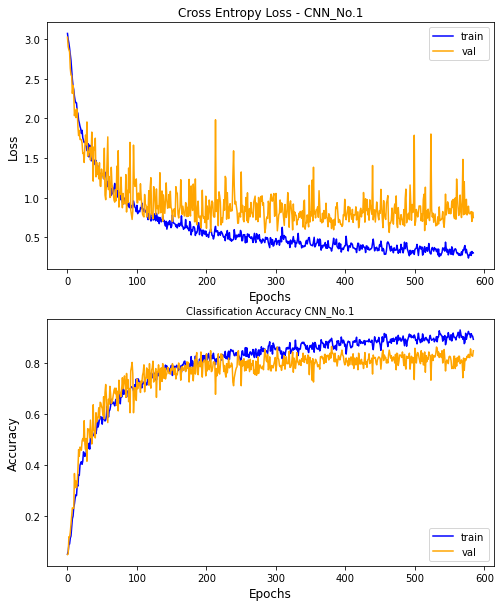

In [22]:
history_plot('CNN_No.1', history)

#### Saving our model to disk

A Keras model consists of multiple components:

+ An architecture, or configuration, which specifies what layers the model contain, and how they're connected.
+ A set of weights values (the "state of the model").
+ An optimizer (defined by compiling the model).
+ A set of losses and metrics (defined by compiling the model or calling add_loss() or add_metric()).
The Keras API makes it possible to save all of these pieces to disk at once, or to only selectively save some of them:

+ Saving everything into a single archive in the TensorFlow SavedModel format (or in the older Keras H5 format). This is the standard practice.
+ Saving the architecture / configuration only, typically as a JSON file.
+ Saving the weights values only. This is generally used when training the model.

In [26]:
saved_model = load_model(checkpoint_best_model)

from datetime import datetime
DTime = datetime.now().strftime('%Y%m%d_%H%M%S')

_, acc = saved_model.evaluate(X_train, y_train, verbose=0)
print('Model evaluate on train, Accuracy %.3f' % (acc * 100.0))
_, acc = saved_model.evaluate(X_val, y_val, verbose=0)
print('Model evaluate on val, Accuracy %.3f' % (acc * 100.0))
_, acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Model evaluate on test, Accuracy %.3f' % (acc * 100.0))
acc_test = round(100*acc,2)

save_file = checkpoint_best_model[0:-5] +'_' + DTime + '_ACC' + str(acc_test)+'.h5'
print("Model saved: ", save_file)
saved_model.save(save_file,  save_format="h5")

Model evaluate on train, Accuracy 98.254
Model evaluate on val, Accuracy 86.429
Model evaluate on test, Accuracy 83.333
Model saved:  model/MultiClass_1Conv_1Conv_20210227_013216_ACC83.33.h5


### Predict test data

In [28]:
_, acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Model evaluate on test, Accuracy %.3f' % (acc * 100.0))
acc_test = round(100*acc,2)



Model evaluate on test, Accuracy 83.333
